In [2]:
import numpy as np
import pylab as pl
%matplotlib notebook

In [2]:
# Parameters describing MMIRS pickoff mirror geometry

# Location and diameter of exit pupil
zp = 71.749 / 0.02714  # Determined by tracing chief ray at 7.2' field angle with mmirs_asbuiltoptics_20110107_corronly.zmx
dp = zp / 5.18661 # Working f/# from Zemax file

# central obscuration ratio from optics.h in shwfs
obsc = 0.28

# Location of fold mirror
zm = 114.8

# Angle of fold mirror 
am = np.radians(42)

# Following dimensions from drawing MMIRS-1233_Rev1.pdf
# Diameter of pickoff mirror
diam = 6.3 * 25.4

# X size of opening in pickoff mirror
xsize = 3.29 * 25.4
# Y size of opening in pickoff mirror
ysize = 3.53 * 25.4

# radius of corner  in pickoff mirror
rcirc = 0.4 * 25.4



In [3]:
# Compute intersection of ray with pickoff mirror
# The ray leaves the exit pupil at position x,y and hits the focal surface at x0,y0
# Math comes from http://geomalgorithms.com/a05-_intersect-1.html

def mirrorpoint (x0,y0,x,y):
    
    # Point in focal plane
    P0 = np.array([x0,y0,0])

    # Point in exit pupil
    P1 = np.array([x * dp / 2, y * dp / 2, zp])

    # Pickoff mirror intesection with optical axis
    V0 = np.array([0, 0, zm])

    # normal to mirror
    if (x0 < 0):
        n = np.array([-np.sin(am), 0, np.cos(am)])
    else:
        n = np.array([np.sin(am), 0, np.cos(am)])
    
    w = P0 - V0

    # Vector connecting P0 to P1
    u = P1 - P0

    # Distance from P0 to intersection as a fraction of abs(u)
    s = -n.dot(w) / n.dot(u)

    # Intersection point on mirror
    P = P0 + s * u

    return (P[0], P[1])

In [4]:
# Determine if a point is on the mirror surface
# x,y = coordinates of ray 
# side=1 means right face of the pickoff mirror, -1=left face
def onmirror(x,y,side):
    if x*x+y*y > diam*diam/4:
        #print "Outside diameter", x,y
        return False
    if x*side<0:
        #print "Wrong side of mirror", x, y
        return False
    x = abs(x)
    y = abs(y)
    if (x>xsize/2 
        or (y>ysize/2)
        or (x>xsize/2-rcirc and y>ysize/2-rcirc and (x-(xsize/2-rcirc))**2 + (y-(ysize/2-rcirc))**2 > rcirc*rcirc)):
        #print "Success!", x, y
        return True
    else:
        #print "Otherwise outside", x, y, xsize/2, ysize/2
        return False
    

In [5]:
# Draw mirror outline
def drawoutline():
    pl.figure()
    circ = np.arange(360) * np.radians(1)
    pl.plot(np.cos(circ) * diam/2,np.sin(circ) * diam/2, "b")
    pl.axes().set_aspect('equal', 'datalim')
    pl.plot([-(xsize/2-rcirc),(xsize/2-rcirc)], [ysize/2, ysize/2],"b")
    pl.plot([-(xsize/2-rcirc),(xsize/2-rcirc)], [-ysize/2, -ysize/2], "b")
    pl.plot([-(xsize/2),-(xsize/2)], [ysize/2-rcirc, -(ysize/2-rcirc)],"b")
    pl.plot([ (xsize/2), (xsize/2)], [ysize/2-rcirc, -(ysize/2-rcirc)],"b")
    pl.plot(np.cos(circ[0:90]) * rcirc + xsize/2 - rcirc, np.sin(circ[0:90]) * rcirc +ysize/2 - rcirc, "b")

    pl.plot(np.cos(circ[90:180]) * rcirc - xsize/2 + rcirc, np.sin(circ[90:180]) * rcirc +ysize/2 - rcirc, "b")
    pl.plot(np.cos(circ[180:270]) * rcirc - xsize/2 + rcirc, np.sin(circ[180:270]) * rcirc -ysize/2 + rcirc, "b")
    pl.plot(np.cos(circ[270:360]) * rcirc + xsize/2 - rcirc, np.sin(circ[270:360]) * rcirc -ysize/2 + rcirc, "b")
    pl.plot([0,0],[ysize/2,diam/2],"b")
    pl.plot([0,0],[-ysize/2,-diam/2],"b")

In [8]:
# Plot a grid of points representing shack hartmann apertures corresponding to wavefront sensor at x0,y0 in mm
# This position is written in the FITS header keywords GUIDERX and GUIDERY

npts = 14
def plotgrid(x0,y0):
    for x in np.arange(-1,1.00001, 2.0 / npts):
        for y in np.arange(-1,1.00001, 2.0 / npts):
            if (x*x+y*y <= 1 and x*x+y*y>=obsc*obsc):  # Only plot points within the telescope aperture
                xm,ym = mirrorpoint(x0,y0, x,y)  # Get intersection with pickoff
                if onmirror(xm,ym,x0/abs(x0)):  # Find out if point is on the mirror surface
                    pl.plot(xm,ym,"g.")
                else:
                    pl.plot(xm,ym,"r.")

<IPython.core.display.Javascript object>


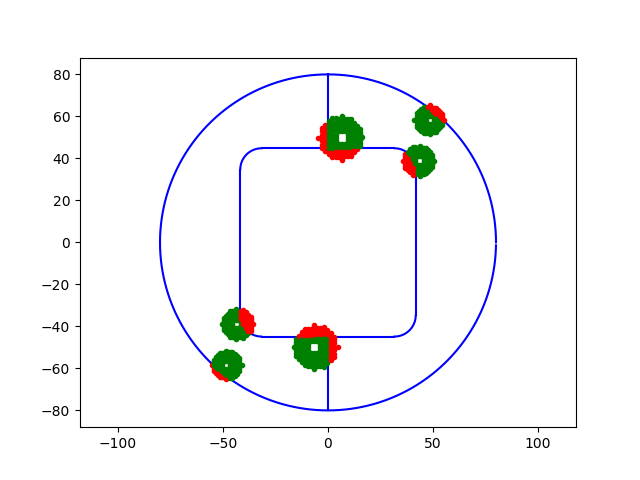

In [18]:
drawoutline()

# Some representative positions that vignette on different edges of the mirror
plotgrid (-50,-60)
plotgrid (-45,-40)
plotgrid (-7,-52)
plotgrid (50,60)
plotgrid (45,40)
plotgrid (7,52)


<IPython.core.display.Javascript object>


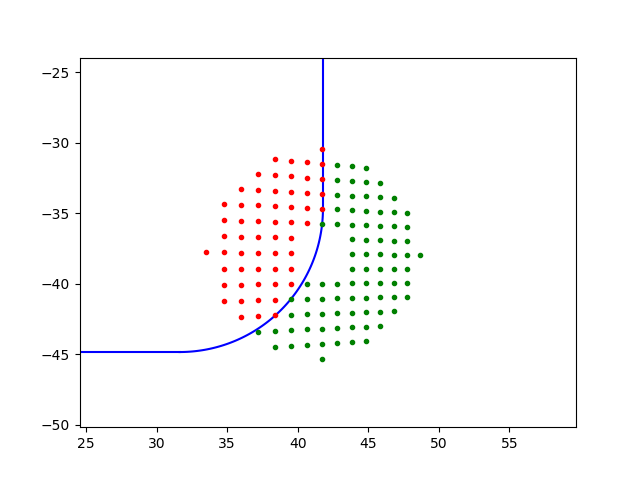

In [22]:
# The PacMan from last WFS image on 2017.1019
drawoutline()
plotgrid(43,-39)

In [3]:
np.radians?